# VGG16 モデルによる転移学習　（猫 vs 犬）

## VGG16モデルとは

　Oxford大学の研究グループが、2014年に開発した深層学習モデルであり、学習データは、ImageNetを用いている。ImageNetは、動物、植物、乗り物といった代表的な１０００種類のクラス分類の画像が、大規模に含まれたデータベースであり、このデータに基づいて、VGG16モデルが構築された。
 　研究グループは、Visual Geometry Groupであったことから、その頭文字を用いて、VGG16モデルと呼ばれることとなった。
  VGG16モデルは、隠れ層が、１６層もあり、2014年の時点では、非常に層が深いとされており、そのために、深層学習といわれている。
  幸いなことに、PythonのKerasライブラリには、VGG16モデル、および、そのパラメータ値が、搭載されており、簡単に呼び出して、利用することができる。
  書籍『TensorFlow開発入門』（太田著）では、VGG16モデルの応用例として、「寺　vs　神社」の分類の解析を実施しており、９５％の正答率を達成している。
  そのほか、VGG16モデルの応用例としては、癌の細胞診検査などの画像診断の分野でも広く有用性が証明されている。
  
  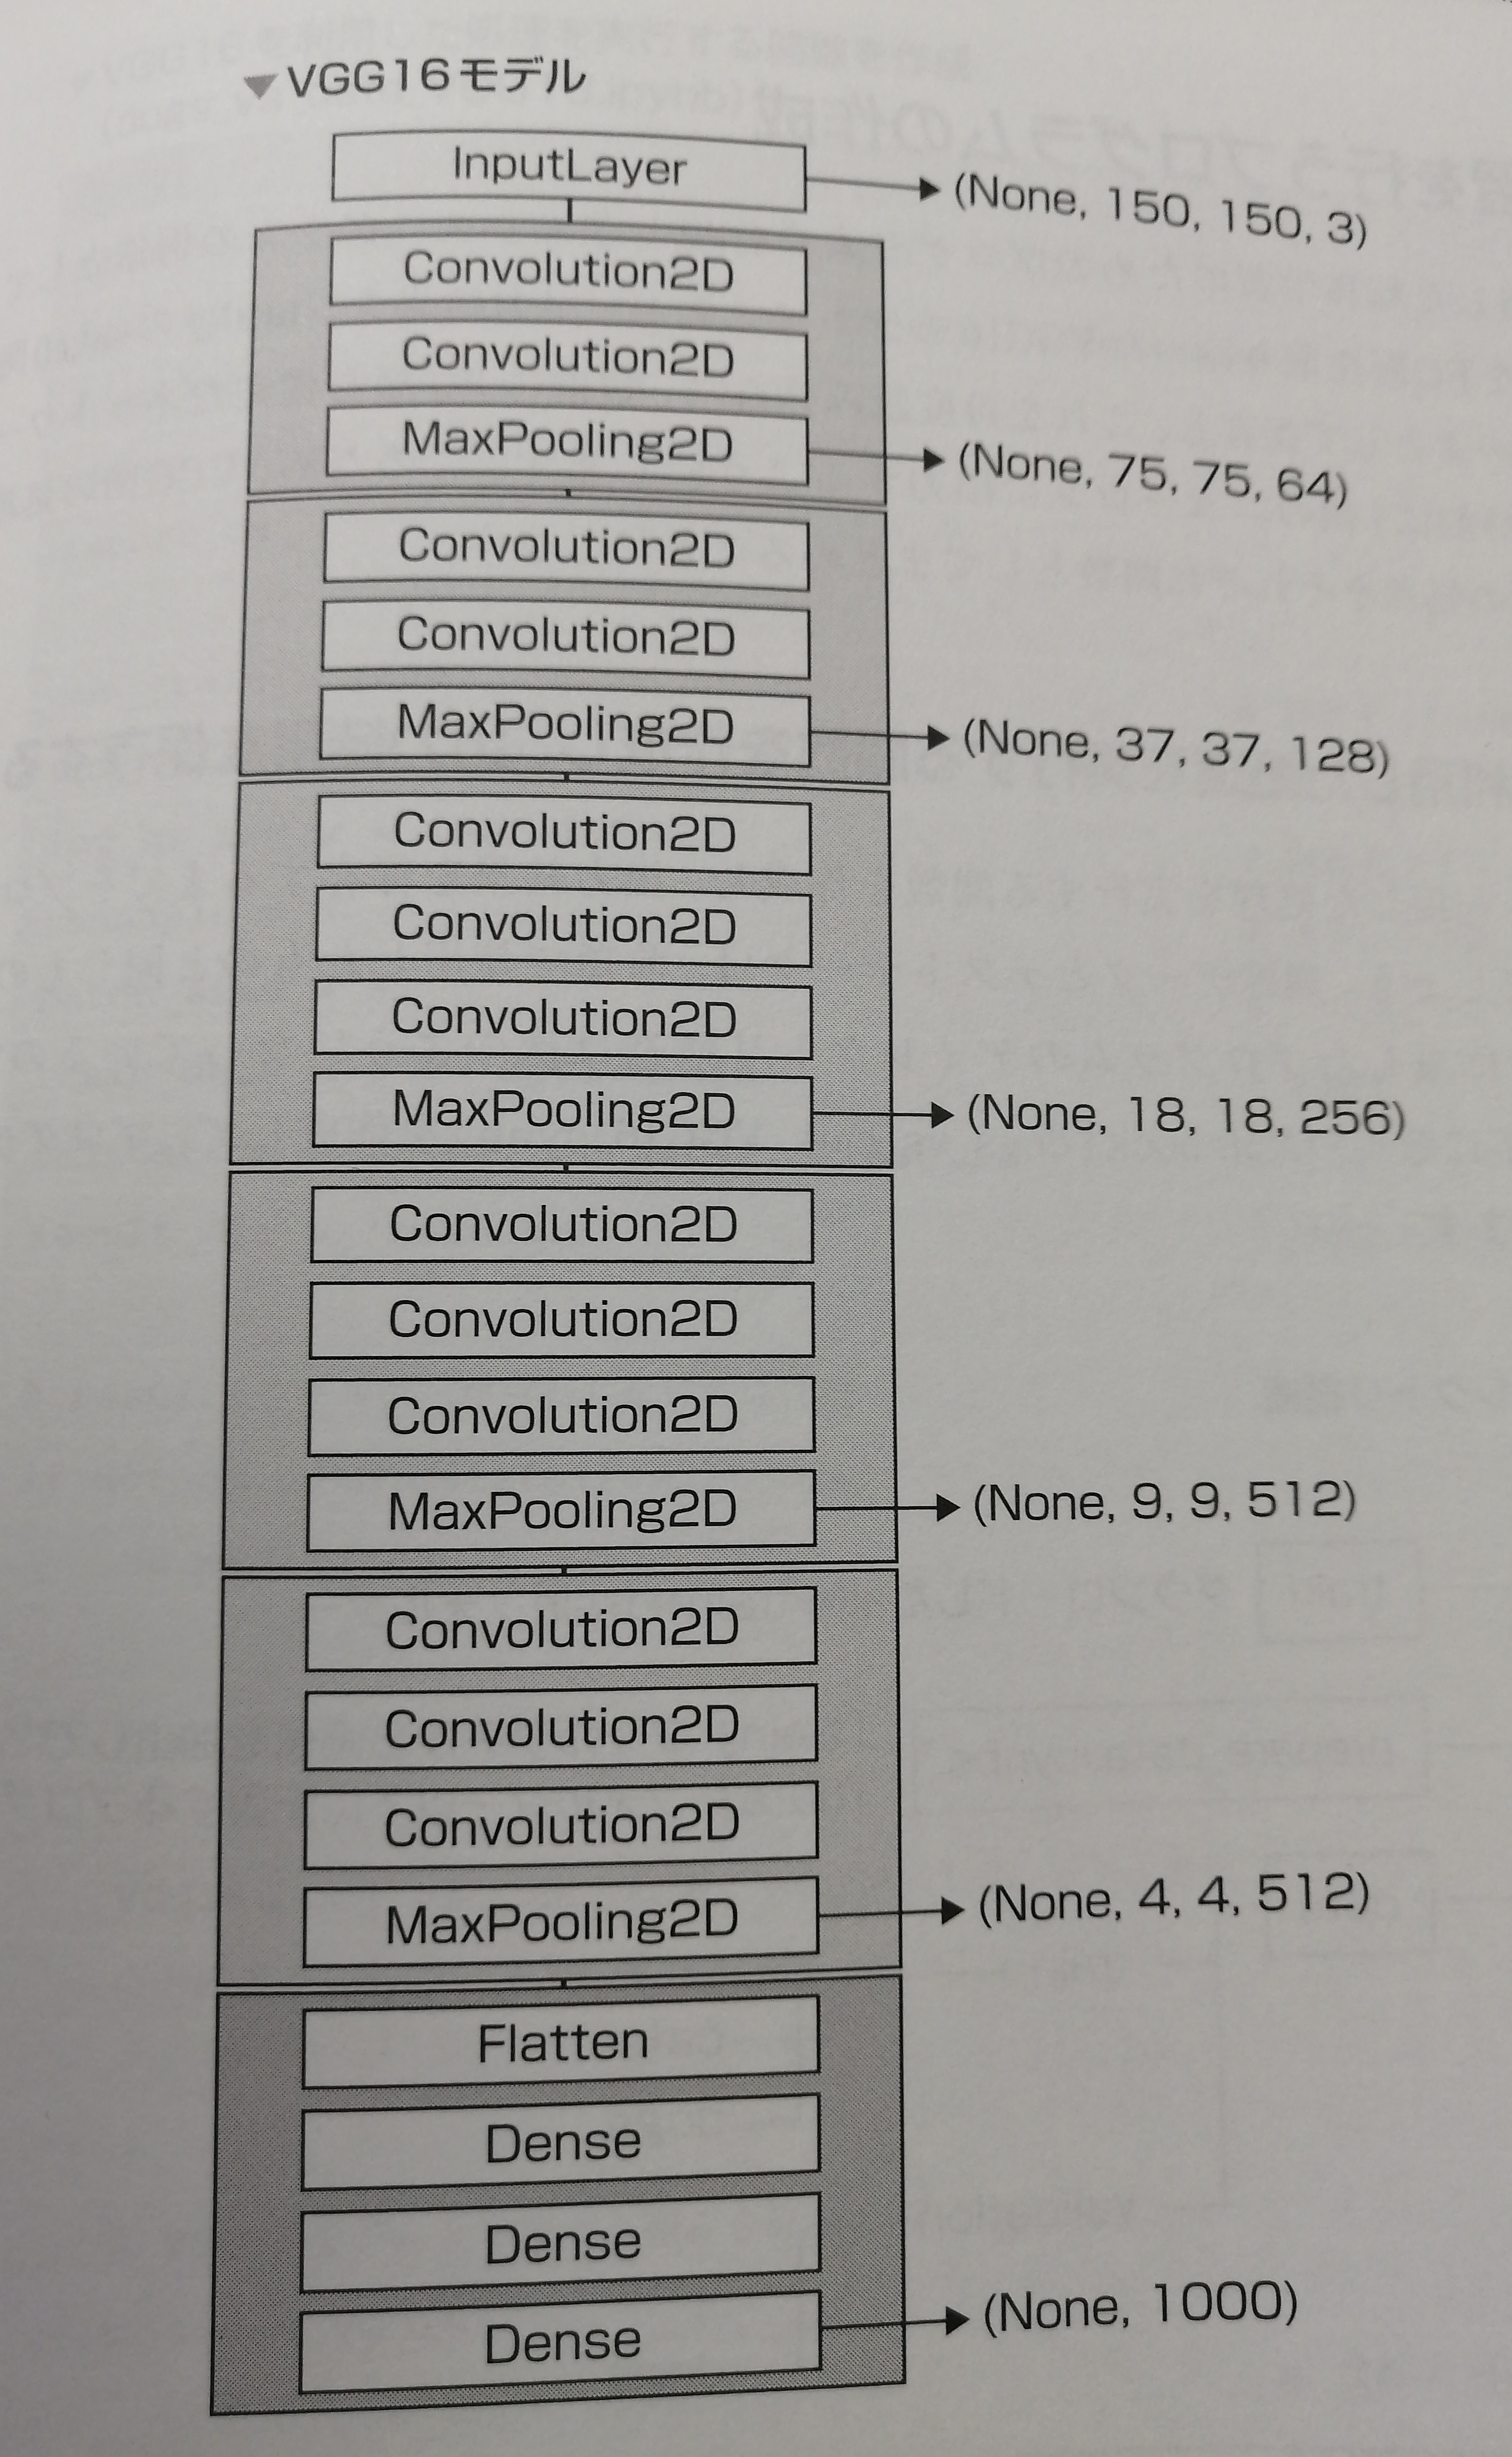
  図　VGG16のモデル
  
  
## VGG16モデルによる転移学習について

　転移学習とは、すでに確立したVGG16モデルのうち、一部のパラメータ値を、再学習することにより、微調整を行って、モデルを再構築することである。
　上図のうち、下層の4層（Flatten, ３つのDense）についてはモデルを再学習し、それ以外のモデルについては、既存のモデルを用いる方法があり、
それを転移学習という。
  モデルの入力データは、（２２４ピクセル，２２４ピクセル）のサイズ、その他、カラーを示すRGB値を含むデータを入力する。しかし、画像の大きさは、入力の際に、加工できるので、任意の大きさでも可能である。
  
  


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.layers import Input
import numpy as np
import os
#import Pillow
#from PIL import Image
#import opencv
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
from keras.preprocessing.image

＃パラメータの設定

num_train = 2000              # 訓練データの画像数
num_validation = 800          # テストデータの画像数
img_h, img_w = 150, 150       # 画像のサイズ
channels = 3                  # チャンネル数
batch_size = 32               # ミニバッチのサイズ
train_data_dir = 'data/train' # 訓練データのフォルダー
validation_data_dir = 'data/validation' # テストデータのフォルダー
result_dir = 'results'        # VGG16の出力結果を保存するフォルダー


# resultsフォルダーが存在しなければ作成
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

    
def save_VGG16_outputs():
    '''
    VGG16にDog vs Catの訓練データ、テストデータを入力し、
    出力結果をnpyファイルに保存する
    
　　'''  
    # VGG16モデルと学習済み重みを読み込む
    model = VGG16(
        include_top=False,            # 全結合層は層（FC）は読み込まない
        weights='imagenet',           # ImageNetで学習した重みを利用
        input_shape=(img_h, img_w, channels) # 入力データの形状
    )
    
    # サマリを表示
    model.summary()

    # 訓練データとテストデータを読み込むジェネレーターを生成
    datagen = ImageDataGenerator(rescale=1.0 / 255)
    # Dog vs Catの訓練データを生成するするジェネレーター
    train_generator = datagen.flow_from_directory(
        train_data_dir,               # 訓練データのフォルダー
        target_size=(img_w, img_h),   # 画像をリサイズ
        batch_size=batch_size,        # ミニバッチのサイズ
        class_mode=None,              # 出力層は存在しないのでclass_modeはNone
        shuffle=False)                # データをシャッフルしない
    # テストデータの正解ラベルを出力
    print('train-label:',train_generator.class_indices) 
    # 訓練データをVGG16モデルに入力し、その出力をファイルに保存
    vgg16_train = model.predict_generator(
        train_generator,              # ジェネレーター
        steps = len(train_generator), # ジェネレーターのサイズを設定
        verbose=1                     # 進捗状況を出力
    )
    # 訓練データの出力を保存
    np.save(os.path.join(result_dir, 'vgg16_train.npy'),
            vgg16_train)

    # Dog vs Catのテストデータを生成するジェネレーター
    validation_generator = datagen.flow_from_directory(
        validation_data_dir,          # テストデータのフォルダー
        target_size=(img_w, img_h),   # 画像をリサイズ
        batch_size=batch_size,        # ミニバッチのサイズ
        class_mode=None,              # 出力層は存在しないのでclass_modeはNone
        shuffle=False)                # データをシャッフルしない
    
    
    # テストデータの正解ラベルを出力
    print('test-label:',validation_generator.class_indices)
    
    
    # テストデーターをVGG16モデルに入力する
    vgg16_test = model.predict_generator(
        validation_generator,              # ジェネレーター
        steps = len(validation_generator), # ジェネレーターのサイズを設定
        verbose=1                          # 進捗状況を出力
    )
    
    
    # テストデータの出力を保存
    np.save(os.path.join(result_dir, 'vgg16_test.npy'),
            vgg16_test)

In [2]:
save_VGG16_outputs()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [2]:
1000 / 2


500.0

In [4]:
import os
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dropout, Flatten, Dense

def train_FClayer():
    '''
    VGG16の出力を入力し、FCネットワークで学習する
    
    '''
    # 訓練データのVGG16からの出力を読み込む
    train_data = np.load(
        os.path.join(result_dir, 'vgg16_train.npy'))    
    # VGG16の訓練データの形状を出力
    print(train_data.shape)    
    # 正解ラベルの作成 最初の2000枚が0(cat),次の2000枚が1(dag)
    train_labels = np.array(
        [0] * int(num_train / 2) + [1] * int(num_train / 2)
    )

    # テストデータのVGG16からの出力を読み込む
    validation_data = np.load(
        os.path.join(result_dir, 'vgg16_test.npy'))
    # VGG16のテストデータの形状を出力
    print(validation_data.shape)    
    # 正解ラベルを作成
    # ネコが0、イヌが1
    # 最初の800枚(cat)に0、次の800枚(dog)に1を割り当てる
    validation_labels = np.array(
        [0] * int(num_validation / 2) + [1] * int(num_validation / 2)
    )

    # FCネットワークの作成
    model = Sequential()
    # Flatten　全結合層への入力を4階テンソルから2階テンソルに変換する
    model.add(Flatten(input_shape=train_data.shape[1:]))
    # 全結合層
    model.add(Dense(256,                   # ニューロン数は256
                    activation='relu'))    # 活性化関数はReLU
    model.add(Dropout(0.5))                # ドロップアウト50％
    # 出力層
    model.add(Dense(1,                     # ニューロン数は256
                    activation='sigmoid')) # 活性化関数はReLU

    # モデルのコンパイル
    model.compile(
        loss='binary_crossentropy',        # バイナリ用の交差エントロピー誤差
        metrics=['accuracy'],              # 学習評価として正解率を指定
        # 確率的勾配降下法で最適化 学習率0.0001
        # 慣性項(Momentum)を0.9にして前回の更新量に0.9倍して加算することで
        # パラメータの更新を慣性的なものにする
        optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
    )

    # 学習の実行
    epoch = 60                             # 学習回数
    batch_size = 32                        # ミニバッチのサイズ
    history = model.fit(train_data,        # 訓練データ
                        train_labels,      # 訓練データの正解ラベル
                        epochs=epoch,      # 学習回数
                        batch_size=batch_size,
                        verbose=1,
                        # テストデータと正解ラベル
                        validation_data=(validation_data,
                                         validation_labels)
                        )
    
    # 学習結果の保存
    with open('model.json', 'w') as json_file:
        json_file.write(model.to_json())
    model.save_weights('weight.h5')

    # historyを返す
    return history


In [5]:
# VGG16の出力をFCネットワークで学習
history = train_FClayer()

(2000, 4, 4, 512)
(800, 4, 4, 512)
Train on 2000 samples, validate on 800 samples
Epoch 1/60
2000/2000 [==============================] - 1s 469us/step - loss: 0.7462 - accuracy: 0.5335 - val_loss: 0.5965 - val_accuracy: 0.7150
Epoch 2/60
2000/2000 [==============================] - 1s 408us/step - loss: 0.5920 - accuracy: 0.6775 - val_loss: 0.5281 - val_accuracy: 0.8000
Epoch 3/60
2000/2000 [==============================] - 1s 403us/step - loss: 0.5339 - accuracy: 0.7355 - val_loss: 0.4904 - val_accuracy: 0.8163
Epoch 4/60
2000/2000 [==============================] - 1s 408us/step - loss: 0.5005 - accuracy: 0.7590 - val_loss: 0.4628 - val_accuracy: 0.8275
Epoch 5/60
2000/2000 [==============================] - 1s 406us/step - loss: 0.4726 - accuracy: 0.7880 - val_loss: 0.4400 - val_accuracy: 0.8363
Epoch 6/60
2000/2000 [==============================] - 1s 400us/step - loss: 0.4530 - accuracy: 0.8025 - val_loss: 0.4212 - val_accuracy: 0.8425
Epoch 7/60
2000/2000 [====================

In [9]:
type(history)
history.history

{'val_loss': [0.5964720892906189,
  0.528095554113388,
  0.4903604483604431,
  0.4628378164768219,
  0.43996414184570315,
  0.4212276566028595,
  0.4066667973995209,
  0.39250322699546814,
  0.3847876960039139,
  0.3702836525440216,
  0.36238898992538454,
  0.3556026792526245,
  0.34755451083183286,
  0.3449581742286682,
  0.3368866240978241,
  0.33381281793117523,
  0.328712654709816,
  0.3287074238061905,
  0.32109795093536375,
  0.31475110590457916,
  0.30954585790634154,
  0.30741912364959717,
  0.30533028542995455,
  0.3021657282114029,
  0.2996568512916565,
  0.2958667433261871,
  0.2942195439338684,
  0.30788257777690886,
  0.2908347648382187,
  0.2896408939361572,
  0.28795458018779757,
  0.28521288096904757,
  0.28470313012599946,
  0.2815971124172211,
  0.287354941368103,
  0.2789727348089218,
  0.2816287189722061,
  0.27848699271678923,
  0.273467658162117,
  0.27421831667423247,
  0.2738524180650711,
  0.27095012962818144,
  0.26847497999668124,
  0.26703385531902313,
  0.2

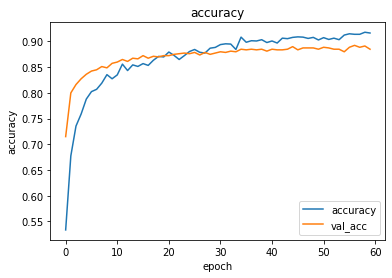

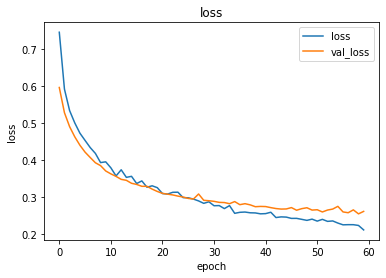

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_acc_loss(history):
    # 精度の推移をプロット
    plt.plot(history.history['accuracy'],"-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"-",label="val_acc")
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の推移をプロット
    plt.plot(history.history['loss'],"-",label="loss",)
    plt.plot(history.history['val_loss'],"-",label="val_loss")
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
# 損失と精度をグラフに出力
plot_acc_loss(history)